# FATAL POLICE SHOOTINGS IN THE US - *Final project for the General Assembly Data Science course*

The 2014 killing of Michael Brown in Ferguson, Missouri, began the protest movement culminating in Black Lives Matter and an increased focus on police accountability nationwide. This project aims to look at data of fatal police shootings in the US taking place between 01.Jan 2015 - 01.June 2017, to investigate whether there is a bias towards young, black males.


Since Jan. 1, 2015, The Washington Post has been compiling a database of every fatal shooting in the US by a police officer in the line of duty. 
It's difficult to find reliable data from before this period, as police killings haven't been comprehensively documented, and the statistics on police brutality are much less available. As a result, a vast number of cases go unreported.



The Washington Post is tracking more than a dozen details about each killing - including the race, age and gender of the deceased, whether the person was armed, and whether the victim was experiencing a mental-health crisis. They have gathered this information from law enforcement websites, local new reports, social media, and by monitoring independent databases such as "Killed by police" and "Fatal Encounters". The Post has also conducted additional reporting in many cases.
This dataset only contains shootings in which a police officer, in the line of duty, shot and killed a civilian. It does not track deaths of people in police custody, fatal shootings by off-duty officers or non-shooting deaths. 

The dataset can be accessed here: https://github.com/washingtonpost/data-police-shootings



## PREPROCESSING DATA

In [61]:
%matplotlib inline
import matplotlib
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
from sklearn import linear_model, metrics

In [62]:
# The original dataset
df = pd.read_csv("./PoliceKillingsUS.csv")
df.head()

,id,name,date,manner_of_death,armed,age,gender,race,city,state,signs_of_mental_illness,threat_level,flee,body_camera
0,3,Tim Elliot,02/01/15,shot,gun,53.0,M,A,Shelton,WA,True,attack,Not fleeing,False
1,4,Lewis Lee Lembke,02/01/15,shot,gun,47.0,M,W,Aloha,OR,False,attack,Not fleeing,False
2,5,John Paul Quintero,03/01/15,shot and Tasered,unarmed,23.0,M,H,Wichita,KS,False,other,Not fleeing,False
3,8,Matthew Hoffman,04/01/15,shot,toy weapon,32.0,M,W,San Francisco,CA,True,attack,Not fleeing,False
4,9,Michael Rodriguez,04/01/15,shot,nail gun,39.0,M,H,Evans,CO,False,attack,Not fleeing,False


In [63]:
df = df.rename(columns={"city": "City"})

df.drop(["id", "name", "manner_of_death"], axis=1, inplace=True) # Deleting useless columns

df.age.fillna(value=df.age.mean(), inplace=True) # Dealing with missing AGE values. Set them to mean of all ages. 
df.age = df.age.astype(int)

df.dropna(subset=["race"], inplace=True) # Deleting rows with missing values for race

df.drop(df.index[2363:], inplace=True) # Deleting deaths after 01/06/2017, as more info is missing about these, including vital information such as race

<br>
Add a column to the dataset called "total population" with the total US population of the corresponding race. 
Source: https://en.wikipedia.org/wiki/Demography_of_the_United_States
<br>

In [64]:
# Adding total_population column with data corresponding to race

conditions = [df["race"]=="A", df["race"]=="W", df["race"]=="H", df["race"]=="B", df["race"]=="N", df["race"]=="O"]
numbers = [14674252, 223553265, 50477594, 38929319, 2932248, 22579629]

df["total_population"] = np.select(conditions, numbers, default="zero")

df.head()

,date,armed,age,gender,race,City,state,signs_of_mental_illness,threat_level,flee,body_camera,total_population
0,02/01/15,gun,53,M,A,Shelton,WA,True,attack,Not fleeing,False,14674252
1,02/01/15,gun,47,M,W,Aloha,OR,False,attack,Not fleeing,False,223553265
2,03/01/15,unarmed,23,M,H,Wichita,KS,False,other,Not fleeing,False,50477594
3,04/01/15,toy weapon,32,M,W,San Francisco,CA,True,attack,Not fleeing,False,223553265
4,04/01/15,nail gun,39,M,H,Evans,CO,False,attack,Not fleeing,False,50477594


<br>
## EXPLORATORY ANALYSIS

### Total number of people killed, by race

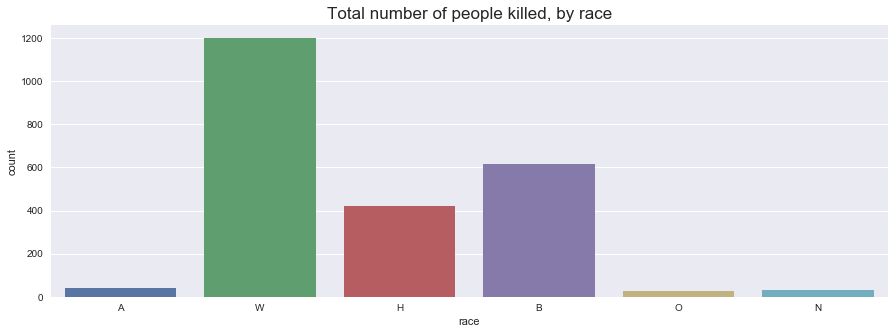

In [65]:
plt.figure(figsize=(15,5))
sns.countplot(data=df, x="race")

plt.title("Total number of people killed, by race", fontsize=17)

The dataset divides race into Asian, White, Hispanic, Black, Native American and Other. From the bar chart we can see that the overwhelming majority being killed by police is either White, Hispanic or Black, with White being the race with the largest amount of victims. 
<br>This makes sense since White is the largest racial group in the US, followed by Black and Hispanic.

### Number of people killed as a proportion of respective races

In [66]:
# List of nr of people killed per race

races = ["A", "W", "H", "B", "N", "O"]
killed_per_race = []

for i in races:
    i_killings = df.race.loc[(df.race==i)].count()
    killed_per_race.append(i_killings)
    
print (killed_per_race)


[39, 1201, 423, 618, 31, 28]


In [67]:
prop_killed_per_race = []

for i in races:
    
    if i == "A":
        prop_i_killed = killed_per_race[0]/14674252.0
        print (prop_i_killed)
    elif i == "W":
        prop_i_killed = killed_per_race[1]/223553265.0
        print (prop_i_killed)
    elif i == "H":
        prop_i_killed = killed_per_race[2]/50477594.0
        print (prop_i_killed)
    elif i == "B":
        prop_i_killed = killed_per_race[3]/38929319.0
        print (prop_i_killed)
    elif i == "N":
        prop_i_killed = killed_per_race[4]/2932248.0
        print (prop_i_killed)
    else:
        prop_i_killed = killed_per_race[5]/22579629.0
        print (prop_i_killed)
    
    prop_killed_per_race.append(prop_i_killed)


2.6577163865e-06
5.37232144652e-06
8.37995566904e-06
1.5874924501e-05
1.05720934928e-05
1.24005580428e-06


In [68]:
prop_killed_per_race

[2.6577163864979287e-06,
 5.3723214465241655e-06,
 8.3799556690439723e-06,
 1.5874924500991144e-05,
 1.0572093492774145e-05,
 1.240055804282701e-06]

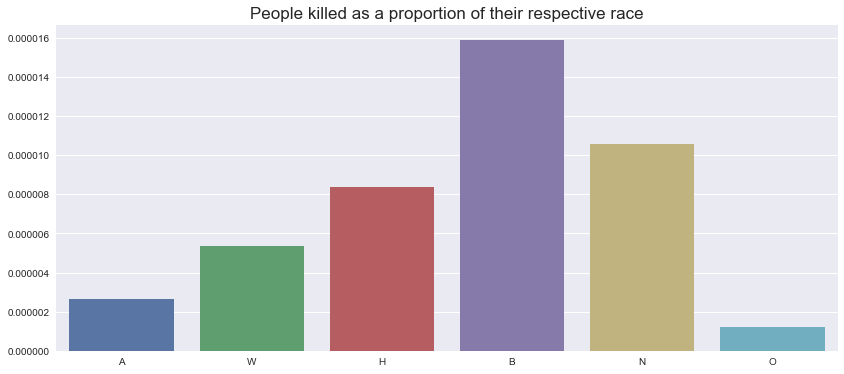

In [69]:
plt.figure(figsize=(14,6))
plt.title("People killed as a proportion of their respective race", fontsize=17)
sns.barplot(x=races, y=prop_killed_per_race)

This bar chart shows the number of victims per race as a proportion of the total US population of respective race.

Earlier, when we looked at the total number of people killed, we saw that twice as many Whites were killed as Blacks. However, if you look at the numbers as the proportion of the racial population, Blacks are approximately 3 times as likely to be killed by police than Whites.

### Total number of people killed, by gender

95% of the victims are male.


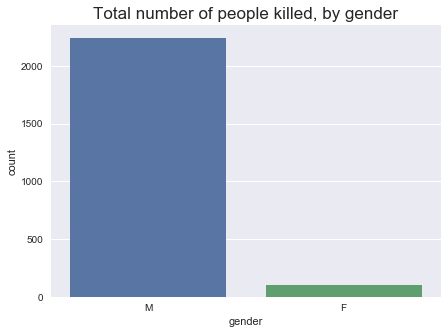

In [70]:
female = df[df["gender"] == "F"].gender.count()
male = df[df["gender"] == "M"].gender.count()
perc_male = (male*100)/(male+female) 

plt.figure(figsize=(7,5))
sns.countplot(data=df, x="gender")

plt.title("Total number of people killed, by gender", fontsize=17)

print (str(perc_male) + "% " + "of the victims are male.")

### General age distribution

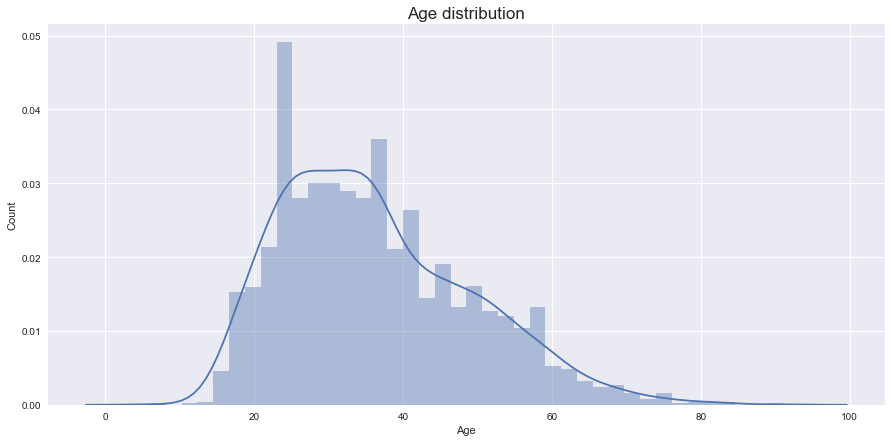

In [71]:
plt.figure(figsize=(15,7))
age_dist = sns.distplot(df["age"], bins=40)
age_dist.set(xlabel="Age", ylabel="Count")

plt.title("Age distribution", fontsize=17)

### Comparing age distributions of Blacks, Whites,  and Hispanics 

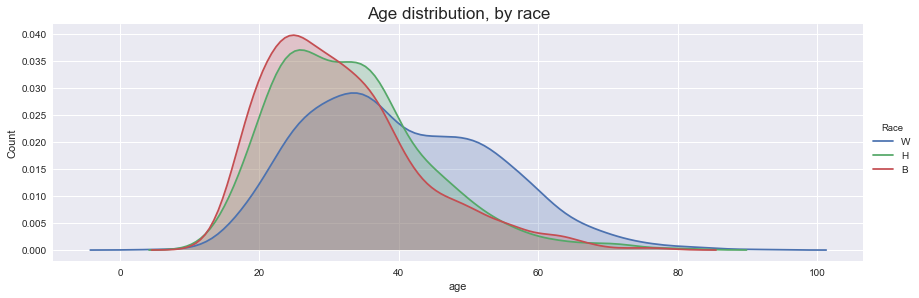

In [72]:
# First, create dataset with only Blacks, Whites, Hispanics

three_races = df.loc[(df["race"] == "B") | (df["race"] == "W") | (df["race"] == "H")]

g = sns.FacetGrid(data=three_races, hue="race", aspect=3, size=4)
g.map(sns.kdeplot, "age", shade=True)
g.add_legend(title="Race")


g.set_ylabels("Count")
plt.title("Age distribution, by race", fontsize=17)

The age distribution of Blacks and Hispanics is skewed to the left, whereas the age distribution for Whites is more spread out. On average, Blacks and Hispanics are being killed at a younger age than Whites - which is consistent with the initial hypothesis that black males are subject to police killings at a young age.

In [73]:
avg_age_w = df.age[(df["race"] == "W")].mean() 
avg_age_b = df.age[(df["race"] == "B")].mean() 
avg_age_h = df.age[(df["race"] == "H")].mean() 

print ("Average age of white victims is " + str(avg_age_w))
print ("Average age of black victims is " + str(avg_age_b))
print ("Average age of hispanic victims is " + str(avg_age_h))

Average age of white victims is 40.0166527893
Average age of black victims is 31.6990291262
Average age of hispanic victims is 33.0661938534


<br>
### Number of fatal shootings in each state

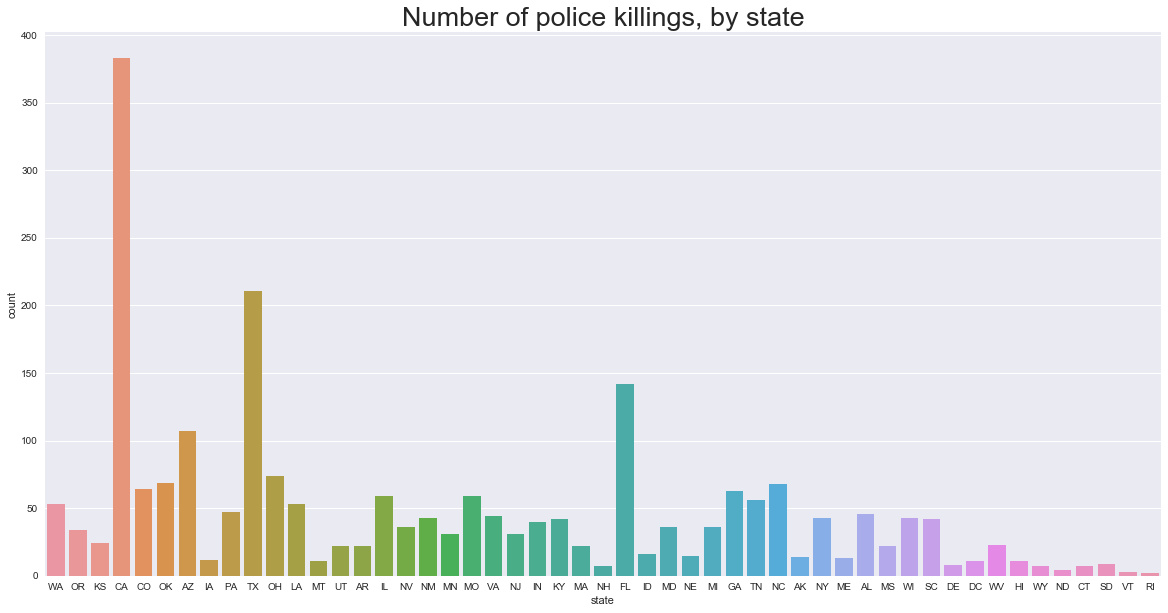

In [74]:
plt.figure(figsize=(20,10))
sns.countplot(data=df, x=df.state)
plt.title("Number of police killings, by state", fontsize=27)

California, Texas and Florida are the states in which police killings are most frequent. These are also the three most populous states in the US.

### Most dangerous cities

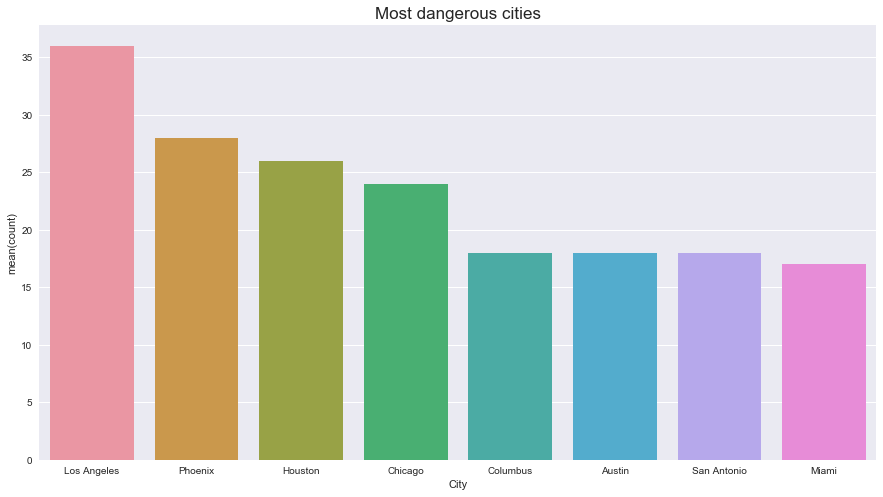

In [75]:
city = df.City.value_counts(ascending=False)

df_city = df.filter(["City"], axis=1)
df_city["count"] = 1

grouped_city = df_city.groupby("City", as_index=False,sort=False).sum()
grouped_city.sort_index(ascending=False)

grouped_city = grouped_city.sort_values("count", ascending=False).head(8)                                                       

plt.figure(figsize=(15,8))
sns.barplot(data=grouped_city, x="City", y="count")
plt.title("Most dangerous cities", fontsize=17)

### Visualizing police shootings using Tableau

In [76]:
%%HTML
<div class='tableauPlaceholder' id='viz1504205405904' style='position: relative'><noscript><a href='#'><img alt='Sheet 1 ' src='https:&#47;&#47;public.tableau.com&#47;static&#47;images&#47;In&#47;InteractivePoliceKillingsMap&#47;Sheet1&#47;1_rss.png' style='border: none' /></a></noscript><object class='tableauViz'  style='display:none;'><param name='host_url' value='https%3A%2F%2Fpublic.tableau.com%2F' /> <param name='path' value='views&#47;InteractivePoliceKillingsMap&#47;Sheet1?:embed=y&amp;:display_count=y&amp;publish=yes' /> <param name='toolbar' value='yes' /><param name='static_image' value='https:&#47;&#47;public.tableau.com&#47;static&#47;images&#47;In&#47;InteractivePoliceKillingsMap&#47;Sheet1&#47;1.png' /> <param name='animate_transition' value='yes' /><param name='display_static_image' value='yes' /><param name='display_spinner' value='yes' /><param name='display_overlay' value='yes' /><param name='display_count' value='yes' /><param name='filter' value='publish=yes' /></object></div>                <script type='text/javascript'>                    var divElement = document.getElementById('viz1504205405904');                    var vizElement = divElement.getElementsByTagName('object')[0];                    vizElement.style.width='100%';vizElement.style.height=(divElement.offsetWidth*0.75)+'px';                    var scriptElement = document.createElement('script');                    scriptElement.src = 'https://public.tableau.com/javascripts/api/viz_v1.js';                    vizElement.parentNode.insertBefore(scriptElement, vizElement);                </script>

### Most common ways of being armed

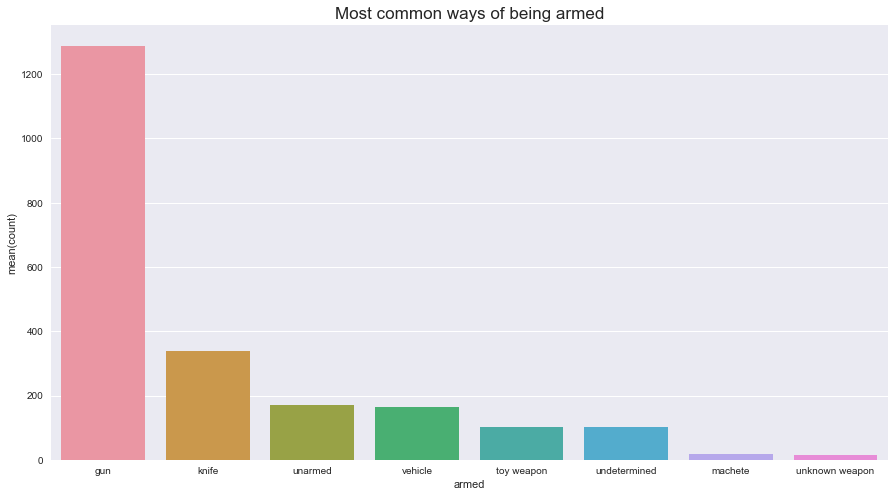

In [77]:
armed = df.armed.value_counts(ascending=False)

df_armed = df.filter(["armed"], axis=1)
df_armed["count"] = 1

grouped_armed = df_armed.groupby("armed", as_index=False,sort=False).sum()
grouped_armed.sort_index(ascending=False)

grouped_armed = grouped_armed.sort_values("count", ascending=False).head(8) 

plt.figure(figsize=(15,8))
sns.barplot(data=grouped_armed, x="armed", y="count")
plt.title("Most common ways of being armed", fontsize=17)

<br>

## Adding features (census data)

Using US census data, I have compiled datasets on median household income, poverty rate, high school graduation rate, and the racial demographic in each city. This information is then added to the original dataset. Below I merge these datasets, and apply various machine learning algorithms to explore whether it's possible to predict the race of a victim based on the features.

#### Preprocessing the census data

In [78]:
income = pd.read_csv("MedianHouseholdIncome2015.csv")
income["City"].replace(["city", "CDP", "town"], "", regex=True, inplace=True)
income["city"] = income["City"] + ", " + income["Geographic Area"]
income.drop(["Geographic Area", "City"], axis=1, inplace=True)

poverty = pd.read_csv("PercentagePeopleBelowPovertyLevel.csv")
poverty["City"].replace(["city", "CDP", "town"], "", regex=True, inplace=True)
poverty["city"] = poverty["City"] + ", " + poverty["Geographic Area"]
poverty.drop(["Geographic Area", "City"], axis=1, inplace=True)

race = pd.read_csv("ShareRaceByCity.csv")
race["City"].replace(["city", "CDP", "town"], "", regex=True, inplace=True) 
race["city"] = race["City"] + ", " + race["Geographic area"]
race.drop(["Geographic area", "City"], axis=1, inplace=True)

highschool = pd.read_csv("PercentOver25CompletedHighSchool.csv")
highschool["City"].replace(["city", "CDP", "town"], "", regex=True, inplace=True)
highschool["city"] = highschool["City"] + ", " + highschool["Geographic Area"]
highschool.drop(["Geographic Area", "City"], axis=1, inplace=True)

#### Merging the datasets

In [79]:
df["city"] = df["City"] + " , " + df["state"] # Creating the same "city" format
merge1 = pd.merge(poverty, race, on="city", how="outer")
merge2 = pd.merge(merge1, income, on="city", how="outer")
merge3 = pd.merge(merge2, highschool, on="city", how="outer")
data = pd.merge(df, merge3, on="city", how="outer")
data.dropna(inplace=True)

data[["Median Income", "poverty_rate", "share_white", "share_black", "share_native_american", "share_asian", 
      "share_hispanic", "percent_completed_hs"]] = data[["Median Income", "poverty_rate", "share_white", "share_black", "share_native_american", "share_asian", 
      "share_hispanic", "percent_completed_hs"]].replace("(X)", np.NaN)
data[["Median Income", "poverty_rate", "share_white", "share_black", "share_native_american", "share_asian", 
      "share_hispanic", "percent_completed_hs"]] = data[["Median Income", "poverty_rate", "share_white", "share_black", "share_native_american", "share_asian", 
      "share_hispanic", "percent_completed_hs"]].replace("-", np.NaN)

data[["Median Income", "poverty_rate", "share_white", "share_black", "share_native_american", "share_asian", 
      "share_hispanic", "percent_completed_hs"]] = data[["Median Income", "poverty_rate", "share_white", "share_black", "share_native_american", "share_asian", 
      "share_hispanic", "percent_completed_hs"]].astype(float)

In [80]:
data.dropna(inplace=True)

In [81]:
# Converting neccesary columns to floats
data["poverty_rate"] = data["poverty_rate"].astype(float)
data["share_white"] = data["share_white"].astype(float)
data["share_black"] = data["share_black"].astype(float)
data["share_native_american"] = data["share_native_american"].astype(float)
data["share_asian"] = data["share_asian"].astype(float)
data["share_hispanic"] = data["share_hispanic"].astype(float)
data["percent_completed_hs"] = data["percent_completed_hs"].astype(float)
data["Median Income"] = data["Median Income"].astype(int)

In [82]:
data.head()

,date,armed,age,gender,race,City,state,signs_of_mental_illness,threat_level,flee,...,total_population,city,poverty_rate,share_white,share_black,share_native_american,share_asian,share_hispanic,Median Income,percent_completed_hs
0,02/01/15,gun,53.0,M,A,Shelton,WA,True,attack,Not fleeing,...,14674252,"Shelton , WA",28.6,78.9,0.8,3.7,1.1,19.2,37072,80.1
1,02/01/15,gun,47.0,M,W,Aloha,OR,False,attack,Not fleeing,...,223553265,"Aloha , OR",14.9,70.9,2.6,1.0,8.9,21.1,65765,88.1
2,02/10/15,knife,55.0,F,W,Aloha,OR,True,other,Not fleeing,...,223553265,"Aloha , OR",14.9,70.9,2.6,1.0,8.9,21.1,65765,88.1
3,03/01/15,unarmed,23.0,M,H,Wichita,KS,False,other,Not fleeing,...,50477594,"Wichita , KS",17.3,71.9,11.5,1.2,4.8,15.3,45947,87.5
4,22/08/15,vehicle,26.0,M,W,Wichita,KS,False,attack,Car,...,223553265,"Wichita , KS",17.3,71.9,11.5,1.2,4.8,15.3,45947,87.5


<br>
## RANDOM FOREST ALGORITHM TO PREDICT RACE

In [83]:
from sklearn.cross_validation import train_test_split
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.ensemble import RandomForestClassifier

In [84]:
# Mapping True/False to 1/0

data["signs_of_mental_illness"] = data["signs_of_mental_illness"].astype(int)
data["body_camera"] = df["body_camera"].astype(int)

# Using LabelEncoder to deal with categorical features

from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()

le.fit(["armed", "race", "gender", "city", "state", "threat_level", "flee"])

LabelEncoder()

In [85]:
data_log = data.apply(LabelEncoder().fit_transform)

X = data_log
y = data_log["race"]
X.drop(["race", "date", "total_population"], axis=1, inplace=True)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=101)

In [86]:
rfc = RandomForestClassifier()
rfc.fit(X_train, y_train) 

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_split=1e-07, min_samples_leaf=1,
            min_samples_split=2, min_weight_fraction_leaf=0.0,
            n_estimators=10, n_jobs=1, oob_score=False, random_state=None,
            verbose=0, warm_start=False)

In [87]:
rfc_pred = rfc.predict(X_test)
rfc.feature_importances_

array([ 0.0519046 ,  0.13659332,  0.0067739 ,  0.04274619,  0.05244911,
        0.02545002,  0.0256923 ,  0.03049124,  0.0164064 ,  0.04577375,
        0.03670264,  0.10189539,  0.1210398 ,  0.04844237,  0.05940386,
        0.09161573,  0.04589423,  0.06072515])

In [88]:
feature_data = pd.DataFrame({"feature_name": data_log.columns, "feature_importance": rfc.feature_importances_}) 
feature_data

,feature_importance,feature_name
0,0.051905,armed
1,0.136593,age
2,0.006774,gender
3,0.042746,City
4,0.052449,state
5,0.025450,signs_of_mental_illness
6,0.025692,threat_level
7,0.030491,flee
8,0.016406,body_camera
9,0.045774,city


The most important features in predicting race using the Random Forest algorithm are age and racial demographics.

In [89]:
print(classification_report(y_test, rfc_pred))

             precision    recall  f1-score   support

          0       0.00      0.00      0.00        12
          1       0.56      0.63      0.59       153
          2       0.60      0.52      0.56       127
          3       0.50      0.29      0.36         7
          4       0.40      0.50      0.44         8
          5       0.73      0.76      0.75       309

avg / total       0.64      0.65      0.65       616



In [90]:
from sklearn.metrics import accuracy_score

# Accuracy score
rf_accuracy_score = accuracy_score(y_test, rfc_pred)
rf_accuracy_score

0.65422077922077926

In [91]:
params = {"max_depth": [32,44,50],
         "n_estimators": [15,18,26,32],
          "min_samples_leaf": [40,50,60],
         "criterion": ["gini", "entropy"]}

from sklearn import model_selection

gs_rf = model_selection.GridSearchCV(estimator=rfc,
                                 param_grid=params,
                                 cv=5,
                                 scoring="accuracy")

gs_rf.fit(X_train, y_train)

GridSearchCV(cv=5, error_score='raise',
       estimator=RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_split=1e-07, min_samples_leaf=1,
            min_samples_split=2, min_weight_fraction_leaf=0.0,
            n_estimators=10, n_jobs=1, oob_score=False, random_state=None,
            verbose=0, warm_start=False),
       fit_params={}, iid=True, n_jobs=1,
       param_grid={'n_estimators': [15, 18, 26, 32], 'criterion': ['gini', 'entropy'], 'max_depth': [32, 44, 50], 'min_samples_leaf': [40, 50, 60]},
       pre_dispatch='2*n_jobs', refit=True, return_train_score=True,
       scoring='accuracy', verbose=0)

In [92]:
# Extract the best parameters
gs_rf.best_params_

{'criterion': 'entropy',
 'max_depth': 50,
 'min_samples_leaf': 50,
 'n_estimators': 32}

In [93]:
# Accuracy score after grid search
gs_rf_accuracy_score = gs_rf.best_score_ 
gs_rf_accuracy_score

0.65901183020180931

<br>

## LOGISTIC REGRESSION ALGORITHM TO PREDICT RACE

In [94]:
# Transforming columns into dummy varaibles

dummies = pd.get_dummies(data[["armed", "gender", "city", "City", "state", "threat_level", "flee","signs_of_mental_illness", "body_camera"]], drop_first=True)
dummies = pd.concat([data, dummies], axis=1)

dummies.drop(data[["date", "armed", "gender", "city", "City", "state", "threat_level", "flee", "total_population","signs_of_mental_illness", "body_camera"]], axis=1, inplace=True)
dummies.dropna()
dummies.head()

,age,race,poverty_rate,share_white,share_black,share_native_american,share_asian,share_hispanic,Median Income,percent_completed_hs,...,state_VT,state_WA,state_WI,state_WV,state_WY,threat_level_other,threat_level_undetermined,flee_Foot,flee_Not fleeing,flee_Other
0,53.0,A,28.6,78.9,0.8,3.7,1.1,19.2,37072,80.1,...,0,1,0,0,0,0,0,0,1,0
1,47.0,W,14.9,70.9,2.6,1.0,8.9,21.1,65765,88.1,...,0,0,0,0,0,0,0,0,1,0
2,55.0,W,14.9,70.9,2.6,1.0,8.9,21.1,65765,88.1,...,0,0,0,0,0,1,0,0,1,0
3,23.0,H,17.3,71.9,11.5,1.2,4.8,15.3,45947,87.5,...,0,0,0,0,0,1,0,0,1,0
4,26.0,W,17.3,71.9,11.5,1.2,4.8,15.3,45947,87.5,...,0,0,0,0,0,0,0,0,0,0


In [95]:
X = dummies.drop("race", axis=1)
y = dummies["race"]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=101)

from sklearn.linear_model import LogisticRegression

logmodel = LogisticRegression()
logmodel.fit(X_train, y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

In [96]:
predictions = logmodel.predict(X_test)
print (classification_report(y_test, predictions))

             precision    recall  f1-score   support

          A       0.00      0.00      0.00        12
          B       0.64      0.59      0.61       153
          H       0.61      0.51      0.56       127
          N       0.00      0.00      0.00         7
          O       0.80      0.50      0.62         8
          W       0.70      0.82      0.76       309

avg / total       0.65      0.67      0.65       616



In [97]:
# Accuracy score
log_accuracy_score = accuracy_score(y_test, predictions)
log_accuracy_score

0.67045454545454541

In [98]:
params = {"max_iter": [20,30,50],
         "C": [1.0, 2.0, 3.0]}

gs_logmodel = model_selection.GridSearchCV(estimator=logmodel,
                                 param_grid=params,
                                 cv=5,
                                 scoring="accuracy")

gs_logmodel.fit(X_train, y_train)

GridSearchCV(cv=5, error_score='raise',
       estimator=LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False),
       fit_params={}, iid=True, n_jobs=1,
       param_grid={'C': [1.0, 2.0, 3.0], 'max_iter': [20, 30, 50]},
       pre_dispatch='2*n_jobs', refit=True, return_train_score=True,
       scoring='accuracy', verbose=0)

In [99]:
gs_logmodel.best_params_

{'C': 3.0, 'max_iter': 20}

In [100]:
# Accuracy score
gs_logmodel_accuracy_score = gs_logmodel.best_score_
gs_logmodel_accuracy_score

0.67084203201113435

<br>

## KNN ALGORITHM

In [101]:
from sklearn.neighbors import KNeighborsClassifier

X = dummies.drop("race", axis=1)
y = dummies["race"]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=101)

knn = KNeighborsClassifier(n_neighbors=1) # k=1
knn.fit(X_train, y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=1, n_neighbors=1, p=2,
           weights='uniform')

In [102]:
pred = knn.predict(X_test)
print(classification_report(y_test, pred))

             precision    recall  f1-score   support

          A       0.00      0.00      0.00        12
          B       0.46      0.51      0.48       153
          H       0.47      0.35      0.40       127
          N       0.15      0.29      0.20         7
          O       0.25      0.38      0.30         8
          W       0.64      0.66      0.65       309

avg / total       0.54      0.54      0.53       616



In [103]:
knn_accuracy_score = accuracy_score(y_test, pred)
knn_accuracy_score

0.53733766233766234

In [104]:
error_rate = []

for i in range(1,30): # Checking every possible k value from 1-30

    knn = KNeighborsClassifier(n_neighbors=i)
    knn.fit(X_train, y_train)
    pred_i = knn.predict(X_test)
    error_rate.append(np.mean(pred_i != y_test)) 

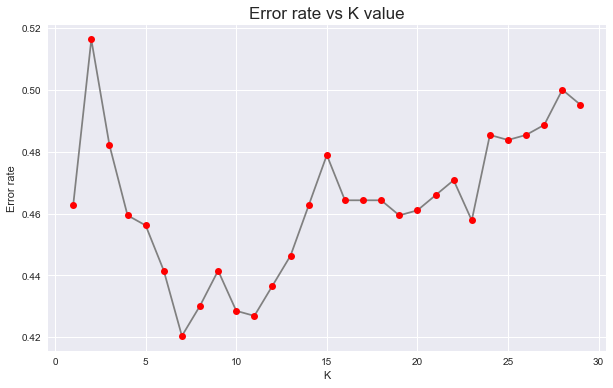

In [105]:
plt.figure(figsize=(10,6))
plt.plot(range(1,30), error_rate, color="grey", marker="o", markerfacecolor="red")
plt.title("Error rate vs K value", fontsize=17)
plt.xlabel("K")
plt.ylabel("Error rate")

k=7 gives the lowest error rate, so we try fitting the model again, using this information.

In [106]:
knn = KNeighborsClassifier(n_neighbors=7)
knn.fit(X_train, y_train)
pred = knn.predict(X_test)

print(classification_report(y_test, pred))

             precision    recall  f1-score   support

          A       0.00      0.00      0.00        12
          B       0.52      0.54      0.53       153
          H       0.48      0.36      0.41       127
          N       0.00      0.00      0.00         7
          O       0.00      0.00      0.00         8
          W       0.64      0.74      0.68       309

avg / total       0.55      0.58      0.56       616



In [107]:
# Accuracy score
knn_accuracy_score_iter = accuracy_score(y_test, pred)
knn_accuracy_score_iter

0.57954545454545459

<br>

# Comparing accuracy scores

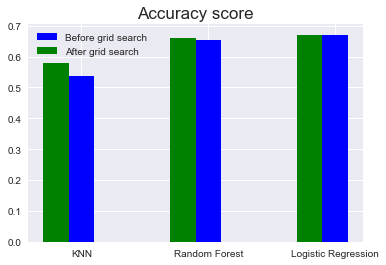

In [108]:
accuracy_pre = {"Random Forest": rf_accuracy_score, 
                "Logistic Regression": log_accuracy_score, 
                "KNN": knn_accuracy_score}

accuracy_post = {"Random Forest": gs_rf_accuracy_score, 
                 "Logistic Regression": gs_logmodel_accuracy_score, 
                 "KNN": knn_accuracy_score_iter}

X = np.arange(len(accuracy_pre))
ax = plt.subplot(111)
ax.bar(X, accuracy_pre.values(), width=0.2, color='b', align='center')
ax.bar(X-0.2, accuracy_post.values(), width=0.2, color='g', align='center')
ax.legend(('Before grid search','After grid search'))
plt.xticks(X, accuracy_pre.keys())
plt.title("Accuracy score", fontsize=17)
plt.show()

Logistic Regression and the Random Forest algorithms yield the highest accuracy score both before and after running grid search. The KNN algorithm performs better after grid search, whereas Logistic Regression and Random Forest don't. 

KNN doesn't do much better than random choice, meaning there is a risk that there simply is no connection between features and the target class.

# FINDINGS - SUMMARY

- Blacks are 3 times more likely to become victims of police shootings than Whites.
- The average age of Black and Hispanic victims is lower (31 and 33 respectively) than that of White victims (40).
- California is the state with the most fatal police shootings, and Los Angeles is the most dangerous city.
- The most common way of being armed is by gun.

#### Critical afterthought

The data has some obvious shortcomings. For instance, it only goes 2.5 years back in time. It would be interesting to look at data from before this period as well, but as previously mentioned, such data is hard to find. Furthermore, this data doesn't track death from other means than by shooting (such as death in police custody and other means of death). 

Judging by the accuracy score of the three algorithms, the features don't do very well in explaining the target class. 

<br>